# Analisi di Sentiment su Recensioni di Scarpe

Questo notebook guida passo dopo passo l'analisi del dataset contenente recensioni di scarpe, incluse pulizia dei dati, analisi del sentiment e visualizzazioni esplorative.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string

# Caricamento dati
df = pd.read_csv("../data/raw/Shoes_Data.csv")
df.head()


,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


## Pulizia dei dati
Rimuoviamo simboli, convertiamo i tipi e normalizziamo le recensioni.

In [3]:
# Rimuoviamo simboli non numerici da 'price'
df['price'] = df['price'].replace('[₹,]', '', regex=True).astype(float)

# Estraiamo il valore numerico da 'rating'
df['rating'] = df['rating'].str.extract(r'([0-9.]+)').astype(float)

# Estraiamo il numero da 'total_reviews'
df['total_reviews'] = df['total_reviews'].str.extract(r'(\d+)').astype(float)

# Espandiamo recensioni e rating
df = df.explode('reviews')
df = df.assign(reviews=df['reviews'].str.split("\|\|")).explode('reviews')
df = df.assign(reviews_rating=df['reviews_rating'].str.split("\|\|")).explode('reviews_rating')

# Convertiamo ratings individuali
df['reviews_rating'] = df['reviews_rating'].str.extract(r'([0-9.]+)').astype(float)

# Rimuoviamo recensioni vuote o null
df.dropna(subset=['reviews', 'reviews_rating'], inplace=True)
df = df[df['reviews'].str.strip() != ""]

df.reset_index(drop=True, inplace=True)
df.head()


<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:13: SyntaxWarning: invalid escape sequence '\|'
<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:13: SyntaxWarning: invalid escape sequence '\|'
C:\Users\MICHELA\AppData\Local\Temp\ipykernel_29668\3873875148.py:12: SyntaxWarning: invalid escape sequence '\|'
  df = df.assign(reviews=df['reviews'].str.split("\|\|")).explode('reviews')
C:\Users\MICHELA\AppData\Local\Temp\ipykernel_29668\3873875148.py:13: SyntaxWarning: invalid escape sequence '\|'
  df = df.assign(reviews_rating=df['reviews_rating'].str.split("\|\|")).explode('reviews_rating')


,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389.0,Elevate your style with this classy pair of Ru...,Not happy with product,1.0,Men
1,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389.0,Elevate your style with this classy pair of Ru...,Not happy with product,1.0,Men
2,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389.0,Elevate your style with this classy pair of Ru...,Not happy with product,3.0,Men
3,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389.0,Elevate your style with this classy pair of Ru...,Not happy with product,3.0,Men
4,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389.0,Elevate your style with this classy pair of Ru...,Not happy with product,3.0,Men


## Pulizia del testo delle recensioni

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df["clean_review"] = df["reviews"].apply(clean_text)
df[["reviews", "clean_review"]].head()


,reviews,clean_review
0,Not happy with product,not happy with product
1,Not happy with product,not happy with product
2,Not happy with product,not happy with product
3,Not happy with product,not happy with product
4,Not happy with product,not happy with product


## Analisi del Sentiment con VADER

In [5]:
nltk.download("vader_lexicon")
sid = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["clean_review"].apply(lambda x: sid.polarity_scores(x)["compound"])
df["sentiment_label"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0.2 else "negative" if x < -0.2 else "neutral")
df[["clean_review", "sentiment_score", "sentiment_label"]].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MICHELA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_review,sentiment_score,sentiment_label
0,not happy with product,-0.4585,negative
1,not happy with product,-0.4585,negative
2,not happy with product,-0.4585,negative
3,not happy with product,-0.4585,negative
4,not happy with product,-0.4585,negative


## Visualizzazioni Esplorative

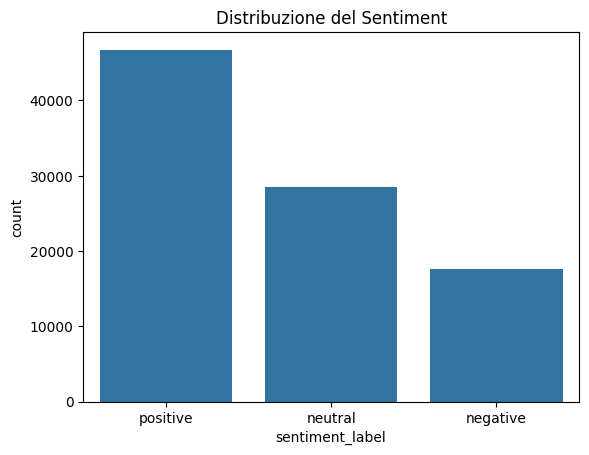

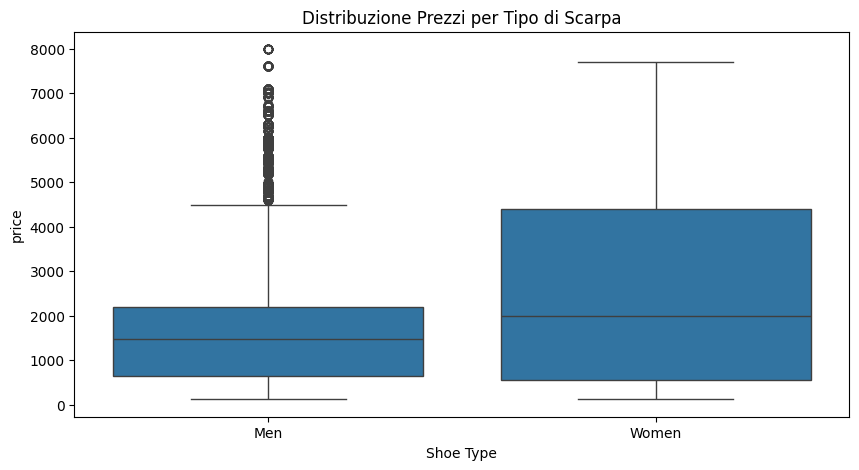

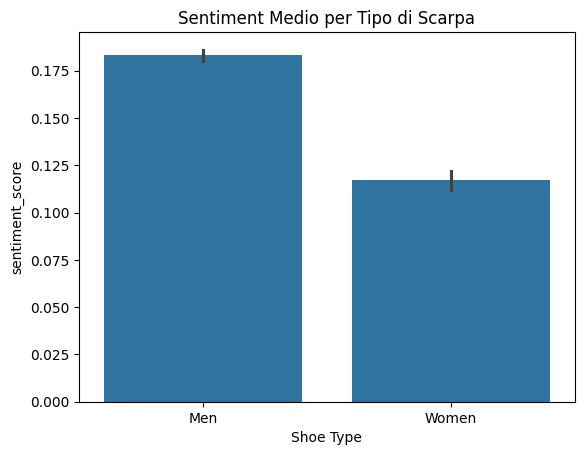

In [6]:
# Distribuzione dei sentiment
sns.countplot(data=df, x="sentiment_label", order=["positive", "neutral", "negative"])
plt.title("Distribuzione del Sentiment")
plt.show()

# Boxplot prezzi per tipo di scarpa
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Shoe Type", y="price")
plt.title("Distribuzione Prezzi per Tipo di Scarpa")
plt.show()

# Sentiment medio per tipo
sns.barplot(data=df, x="Shoe Type", y="sentiment_score")
plt.title("Sentiment Medio per Tipo di Scarpa")
plt.show()


## Conclusioni
- Le recensioni sono state ripulite e analizzate.
- Il sentiment è stato etichettato e confrontato con i prezzi e il tipo di scarpa.
- Il dataset ora è pronto per essere utilizzato in applicazioni interattive con Streamlit o Dash.